# Introduction
In this data analysis excercise we are going to see Crude Death rate and Age Standardized Death rate. We have below assets at our disposal-


1.   Population Exposure dataset from WHO('WPP2022_PopulationByAge5GroupSex_Medium'-5 July 2022)
2.   Death rates of chronic obstructive pulmonary disease(COPD) of specific age for both countries.
3. A pdf which contains the WHO standard population data in Table-1.

**Data Processing-**


*   First we are going to load population dataset and filter it for USA and Uganda Population for 2019. We will create two new dataframes which will contain population data for USA and Uganda.
*   Saved COPD death rate in a csv.
*   Used Pdfplumber tool to extract the Table 1 from the WHO pdf. Table is at page-9.

We will clean the data if required.

**Methodologies-**

Now we have two seperate dataframes for each counrty(USA-df_am, Uganda-df_ugh). We will merge the COPD Death rates and WHO standard Population in both the dataframes.

After that we will calculate total death due to COPD for each specific age group using COPD death rate and Total Population.

Calculating crude rate for 100k population= (Total_deaths/Total_population)*100000

To calculate Age Standardized death rate - we will multiply each age specific death rate with WHO standard population proportion. and add them all. This will give us age adjusted death rate for the country.


# Loading Libraries and Dataset

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np

In [2]:
#Loading the WHO Population Dataset

df=pd.read_csv('/content/WPP2022_PopulationByAge5GroupSex_Medium.csv')
df.head()

<ipython-input-2-6dc03defac46>:3: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/WPP2022_PopulationByAge5GroupSex_Medium.csv')


,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,0-4,0,5,174647.391,167229.405,341876.795
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,5-9,5,5,136914.008,130816.575,267730.584
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,10-14,10,5,132112.875,125967.993,258080.868
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,15-19,15,5,120512.860,116660.508,237173.367
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,20-24,20,5,111019.768,109095.897,220115.665


In [3]:
#Checking the data types of the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903735 entries, 0 to 903734
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SortOrder    903735 non-null  int64  
 1   LocID        903735 non-null  int64  
 2   Notes        237825 non-null  object 
 3   ISO3_code    748356 non-null  object 
 4   ISO2_code    745185 non-null  object 
 5   SDMX_code    891051 non-null  float64
 6   LocTypeID    903735 non-null  int64  
 7   LocTypeName  903735 non-null  object 
 8   ParentID     903735 non-null  int64  
 9   Location     903735 non-null  object 
 10  VarID        903735 non-null  int64  
 11  Variant      903735 non-null  object 
 12  Time         903735 non-null  int64  
 13  MidPeriod    903735 non-null  int64  
 14  AgeGrp       903735 non-null  object 
 15  AgeGrpStart  903735 non-null  int64  
 16  AgeGrpSpan   903735 non-null  int64  
 17  PopMale      903735 non-null  float64
 18  PopFemale    903735 non-

In [4]:
# Checking Null Values

df.isnull().sum()

SortOrder           0
LocID               0
Notes          665910
ISO3_code      155379
ISO2_code      158550
SDMX_code       12684
LocTypeID           0
LocTypeName         0
ParentID            0
Location            0
VarID               0
Variant             0
Time                0
MidPeriod           0
AgeGrp              0
AgeGrpStart         0
AgeGrpSpan          0
PopMale             0
PopFemale           0
PopTotal            0
dtype: int64

As we can see that there are Null values in 4 columns. But those columns are not useful for our task. We can delete those columns and other redundant columns.

In [5]:
#Delete the un-necessary columns

df.drop(columns={'SortOrder', 'LocID','Notes','ISO3_code','ISO2_code', 'SDMX_code', 'LocTypeID','ParentID','VarID','Variant'},axis=1, inplace=True)

In [6]:
df.head()

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,World,World,1950,1950,0-4,0,5,174647.391,167229.405,341876.795
1,World,World,1950,1950,5-9,5,5,136914.008,130816.575,267730.584
2,World,World,1950,1950,10-14,10,5,132112.875,125967.993,258080.868
3,World,World,1950,1950,15-19,15,5,120512.860,116660.508,237173.367
4,World,World,1950,1950,20-24,20,5,111019.768,109095.897,220115.665


# Creating Datasets

**Creating two new datasets for USA and Uganda Population. We will use these 2 datasets in future. Also saving these into csv for future use.**

# 1- Uganda



In [7]:
#creating Dataframe df_ugh which will contain the 2019 population data of Uganda.

df_ugh=df[(df['Location']=='Uganda') & (df['Time']==2019)]


#Viewing the dataset
df_ugh

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
128289,Country/Area,Uganda,2019,2019,0-4,0,5,3700.316,3628.652,7328.968
128290,Country/Area,Uganda,2019,2019,5-9,5,5,3324.760,3289.660,6614.421
128291,Country/Area,Uganda,2019,2019,10-14,10,5,2950.579,2948.821,5899.400
128292,Country/Area,Uganda,2019,2019,15-19,15,5,2567.074,2584.008,5151.082
128293,Country/Area,Uganda,2019,2019,20-24,20,5,2161.655,2186.517,4348.173
128294,Country/Area,Uganda,2019,2019,25-29,25,5,1732.902,1766.602,3499.504
128295,Country/Area,Uganda,2019,2019,30-34,30,5,1290.940,1327.619,2618.559
128296,Country/Area,Uganda,2019,2019,35-39,35,5,933.050,970.125,1903.175
128297,Country/Area,Uganda,2019,2019,40-44,40,5,731.193,772.476,1503.669
128298,Country/Area,Uganda,2019,2019,45-49,45,5,592.457,642.523,1234.979


In [8]:
#Resetting Index

df_ugh.reset_index(drop=True,inplace=True)

We can see here that the Populations are presented as Floating. We have to multiply it by 1000 and then change its datatype to Int64.

In [9]:
# Multiplying PopMale, PopFemale and PopTotal with 1000- Though we are only going to use PopTotal for our purpose but for any future data analysis we will have that handy.


df_ugh['PopMale']=df_ugh['PopMale']*1000
df_ugh['PopFemale']=df_ugh['PopFemale']*1000
df_ugh['PopTotal']=df_ugh['PopTotal']*1000

<ipython-input-9-25e08a75028b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ugh['PopMale']=df_ugh['PopMale']*1000
<ipython-input-9-25e08a75028b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ugh['PopFemale']=df_ugh['PopFemale']*1000
<ipython-input-9-25e08a75028b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [10]:
# We can see below- the index is resetted and all three populations columns values are multiplied by 1000
df_ugh

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,Country/Area,Uganda,2019,2019,0-4,0,5,3700316.0,3628652.0,7328968.0
1,Country/Area,Uganda,2019,2019,5-9,5,5,3324760.0,3289660.0,6614421.0
2,Country/Area,Uganda,2019,2019,10-14,10,5,2950579.0,2948821.0,5899400.0
3,Country/Area,Uganda,2019,2019,15-19,15,5,2567074.0,2584008.0,5151082.0
4,Country/Area,Uganda,2019,2019,20-24,20,5,2161655.0,2186517.0,4348173.0
5,Country/Area,Uganda,2019,2019,25-29,25,5,1732902.0,1766602.0,3499504.0
6,Country/Area,Uganda,2019,2019,30-34,30,5,1290940.0,1327619.0,2618559.0
7,Country/Area,Uganda,2019,2019,35-39,35,5,933050.0,970125.0,1903175.0
8,Country/Area,Uganda,2019,2019,40-44,40,5,731193.0,772476.0,1503669.0
9,Country/Area,Uganda,2019,2019,45-49,45,5,592457.0,642523.0,1234979.0


In [11]:
# Converting dtype of PopMale, PopFemale and PopTotal to int

df_ugh['PopMale']=df_ugh['PopMale'].astype(int)
df_ugh['PopFemale']=df_ugh['PopFemale'].astype(int)
df_ugh['PopTotal']=df_ugh['PopTotal'].astype(int)

df_ugh

<ipython-input-11-c491b5b6b2a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ugh['PopMale']=df_ugh['PopMale'].astype(int)
<ipython-input-11-c491b5b6b2a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ugh['PopFemale']=df_ugh['PopFemale'].astype(int)
<ipython-input-11-c491b5b6b2a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,Country/Area,Uganda,2019,2019,0-4,0,5,3700316,3628652,7328968
1,Country/Area,Uganda,2019,2019,5-9,5,5,3324760,3289660,6614421
2,Country/Area,Uganda,2019,2019,10-14,10,5,2950579,2948821,5899400
3,Country/Area,Uganda,2019,2019,15-19,15,5,2567074,2584008,5151082
4,Country/Area,Uganda,2019,2019,20-24,20,5,2161655,2186517,4348173
5,Country/Area,Uganda,2019,2019,25-29,25,5,1732902,1766602,3499504
6,Country/Area,Uganda,2019,2019,30-34,30,5,1290940,1327619,2618559
7,Country/Area,Uganda,2019,2019,35-39,35,5,933050,970125,1903175
8,Country/Area,Uganda,2019,2019,40-44,40,5,731193,772476,1503669
9,Country/Area,Uganda,2019,2019,45-49,45,5,592457,642523,1234979


One other thing to note that we only have Age Group till 85+ in the death rate table. But in the dataset we have age group till 100+. We will add last four rows ie- 85-89, 90-94, 95-99 and 100+. We will add the added total in 85 group and rename 85-89 to 85+.

In [13]:
# Calculating sum of the last 4 rows and saving it in a temp variable

ug_agg=df_ugh.iloc[-4:].agg('sum')
print(ug_agg)

LocTypeName    Country/AreaCountry/AreaCountry/AreaCountry/Area
Location                               UgandaUgandaUgandaUganda
Time                                                       8076
MidPeriod                                                  8076
AgeGrp                                      85-8990-9495-99100+
AgeGrpStart                                                 370
AgeGrpSpan                                                   14
PopMale                                                    6715
PopFemale                                                 12988
PopTotal                                                  19702
dtype: object


In [14]:
# Updating row 17 values for the three populations columns we have.

df_ugh.iloc[17,9]=ug_agg.PopTotal
df_ugh.iloc[17,8]=ug_agg.PopFemale
df_ugh.iloc[17,7]=ug_agg.PopMale

# Checking if the value updated or not
df_ugh.tail()


,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
16,Country/Area,Uganda,2019,2019,80-84,80,5,15880,28012,43893
17,Country/Area,Uganda,2019,2019,85-89,85,5,6715,12988,19702
18,Country/Area,Uganda,2019,2019,90-94,90,5,1172,2393,3564
19,Country/Area,Uganda,2019,2019,95-99,95,5,231,386,617
20,Country/Area,Uganda,2019,2019,100+,100,-1,52,44,96


In [15]:
# Dropping the last 3 rows- which have age groups: 90-94, 95-99, 100+
df_ugh.drop([18,19,20], inplace=True)

# Updating the age group 85-89 to 85+
df_ugh.iloc[17,4]='85+'
df_ugh.tail()

<ipython-input-15-0ffb8e53484c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ugh.drop([18,19,20], inplace=True)


,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
13,Country/Area,Uganda,2019,2019,65-69,65,5,147002,206220,353221
14,Country/Area,Uganda,2019,2019,70-74,70,5,81552,115618,197171
15,Country/Area,Uganda,2019,2019,75-79,75,5,36309,56373,92682
16,Country/Area,Uganda,2019,2019,80-84,80,5,15880,28012,43893
17,Country/Area,Uganda,2019,2019,85+,85,5,6715,12988,19702


In [16]:
# Saving our refined dataframe of Uganda into csv- Ugandapop.csv

df_ugh.to_csv('Ugandapop.csv')

# 2- United States of *America*

In [17]:
#creating Dataframe df_am which will contain the 2019 population data of United States of America.

df_am=df[(df['Location']=='United States of America') & (df['Time']==2019)]


#Viewing the dataset
df_am

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
813225,Country/Area,United States of America,2019,2019,0-4,0,5,10148.221,9700.335,19848.556
813226,Country/Area,United States of America,2019,2019,5-9,5,5,10595.892,10101.183,20697.075
813227,Country/Area,United States of America,2019,2019,10-14,10,5,11308.633,10783.534,22092.167
813228,Country/Area,United States of America,2019,2019,15-19,15,5,11187.440,10707.683,21895.123
813229,Country/Area,United States of America,2019,2019,20-24,20,5,11150.829,10720.979,21871.808
813230,Country/Area,United States of America,2019,2019,25-29,25,5,11875.915,11531.013,23406.928
813231,Country/Area,United States of America,2019,2019,30-34,30,5,11568.362,11273.789,22842.151
813232,Country/Area,United States of America,2019,2019,35-39,35,5,11252.331,11044.621,22296.952
813233,Country/Area,United States of America,2019,2019,40-44,40,5,10367.013,10327.542,20694.555
813234,Country/Area,United States of America,2019,2019,45-49,45,5,10626.499,10617.759,21244.258


We can see here that the Populations are presented as Floating. We have to multiply it by 1000 and then change its datatype to Int64.

In [18]:
#Resetting Index

df_am.reset_index(drop=True, inplace=True)

In [19]:
# Multiplying PopMale, PopFemale and PopTotal with 1000- Though we are only going to use PopTotal for our purpose but for any future data analysis we will have that handy.

df_am['PopMale']=df_am['PopMale']*1000
df_am['PopFemale']=df_am['PopFemale']*1000
df_am['PopTotal']=df_am['PopTotal']*1000

<ipython-input-19-5600c35db660>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['PopMale']=df_am['PopMale']*1000
<ipython-input-19-5600c35db660>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['PopFemale']=df_am['PopFemale']*1000
<ipython-input-19-5600c35db660>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [20]:
# We can see below- the index is resetted and all three populations columns values are multiplied by 1000

df_am.head()

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,Country/Area,United States of America,2019,2019,0-4,0,5,10148221.0,9700335.0,19848556.0
1,Country/Area,United States of America,2019,2019,5-9,5,5,10595892.0,10101183.0,20697075.0
2,Country/Area,United States of America,2019,2019,10-14,10,5,11308633.0,10783534.0,22092167.0
3,Country/Area,United States of America,2019,2019,15-19,15,5,11187440.0,10707683.0,21895123.0
4,Country/Area,United States of America,2019,2019,20-24,20,5,11150829.0,10720979.0,21871808.0


In [21]:
# Converting dtype of PopMale, PopFemale and PopTotal to int

df_am['PopMale']=df_am['PopMale'].apply(np.int64)
df_am['PopFemale']=df_am['PopFemale'].apply(np.int64)
df_am['PopTotal']=df_am['PopTotal'].apply(np.int64)

df_am

<ipython-input-21-295cb327c138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['PopMale']=df_am['PopMale'].apply(np.int64)
<ipython-input-21-295cb327c138>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['PopFemale']=df_am['PopFemale'].apply(np.int64)
<ipython-input-21-295cb327c138>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,Country/Area,United States of America,2019,2019,0-4,0,5,10148221,9700335,19848556
1,Country/Area,United States of America,2019,2019,5-9,5,5,10595892,10101183,20697075
2,Country/Area,United States of America,2019,2019,10-14,10,5,11308633,10783534,22092167
3,Country/Area,United States of America,2019,2019,15-19,15,5,11187440,10707683,21895123
4,Country/Area,United States of America,2019,2019,20-24,20,5,11150829,10720979,21871808
5,Country/Area,United States of America,2019,2019,25-29,25,5,11875915,11531013,23406928
6,Country/Area,United States of America,2019,2019,30-34,30,5,11568362,11273789,22842151
7,Country/Area,United States of America,2019,2019,35-39,35,5,11252331,11044621,22296952
8,Country/Area,United States of America,2019,2019,40-44,40,5,10367013,10327542,20694555
9,Country/Area,United States of America,2019,2019,45-49,45,5,10626499,10617759,21244258


One other thing to note that we only have Age Group till 85+ in the death rate table. But in the dataset we have age group till 100+. We will add last four rows ie- 85-89, 90-94, 95-99 and 100+. We will add the added total in 85 group and rename 85-89 to 85+.

In [22]:
# Calculating sum of the last 4 rows and saving it in a temp variable

us_agg=df_am.iloc[-4:].agg('sum')
print(us_agg)


LocTypeName     Country/AreaCountry/AreaCountry/AreaCountry/Area
Location       United States of AmericaUnited States of Ameri...
Time                                                        8076
MidPeriod                                                   8076
AgeGrp                                       85-8990-9495-99100+
AgeGrpStart                                                  370
AgeGrpSpan                                                    14
PopMale                                                  2377446
PopFemale                                                3836508
PopTotal                                                 6213954
dtype: object


In [23]:
# Updating the value of PopMale, PopFemale and PopTotal of row 17.

df_am.iloc[17,9]=us_agg.PopTotal
df_am.iloc[17,8]=us_agg.PopFemale
df_am.iloc[17,7]=us_agg.PopMale

df_am.tail()


,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
16,Country/Area,United States of America,2019,2019,80-84,80,5,2632968,3485899,6118867
17,Country/Area,United States of America,2019,2019,85-89,85,5,2377446,3836508,6213954
18,Country/Area,United States of America,2019,2019,90-94,90,5,606525,1049542,1656067
19,Country/Area,United States of America,2019,2019,95-99,95,5,150707,351048,501755
20,Country/Area,United States of America,2019,2019,100+,100,-1,16962,61992,78955


In [24]:
# Dropping the last 3 rows; which have age groups: 90-94, 95-99, 100+

df_am.drop([18,19,20], inplace=True)

# Updating the Age group: 85-89 to 85+

df_am.iloc[17,4]='85+'
df_am.tail()

<ipython-input-24-cad4be16c9fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am.drop([18,19,20], inplace=True)


,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
13,Country/Area,United States of America,2019,2019,65-69,65,5,8320668,9180203,17500872
14,Country/Area,United States of America,2019,2019,70-74,70,5,6329613,7358983,13688595
15,Country/Area,United States of America,2019,2019,75-79,75,5,4186846,5085962,9272809
16,Country/Area,United States of America,2019,2019,80-84,80,5,2632968,3485899,6118867
17,Country/Area,United States of America,2019,2019,85+,85,5,2377446,3836508,6213954


In [25]:
# Saving our refined dataframe of United States into csv- USApop.csv

df_am.to_csv('USApop.csv')

# Extracting Table 1 from the WHO Population Standard PDF


In [26]:
# installing the PDFPlumber tool

!pip install pdfplumber
import pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 54.2 MB/s eta 0:00:00


In [27]:
#Reading the Table content from the file, where the table-1 is located i.e. page number 9.

filename1="/content/gpe_discussion_paper_series_paper31_2001_age_standardization_rates.pdf"
pdf=pdfplumber.open(filename1)
table=pdf.pages[9].extract_table()
header=1
columns=list()
for column in table[header]:
   if column!=None and len(column)>1:
      columns.append(column)
print(columns)

df2=pd.DataFrame(table[header+1:])
df2=df2.rename_axis(index=None)
df2.columns=columns

df2

['Age group', 'Segi (“world”) standard', 'Scandinavian (“European”) standard', 'WHO World Standard*']


,Age group,Segi (“world”) standard,Scandinavian (“European”) standard,WHO World Standard*
0,0-4,12.00,8.00,8.86
1,5-9,10.00,7.00,8.69
2,10-14,9.00,7.00,8.60
3,15-19,9.00,7.00,8.47
4,20-24,8.00,7.00,8.22
5,25-29,8.00,7.00,7.93
6,30-34,6.00,7.00,7.61
7,35-39,6.00,7.00,7.15
8,40-44,6.00,7.00,6.59
9,45-49,6.00,7.00,6.04


In [28]:
# Deleting the 2nd and 3rd columns, we are not going to use it

df2.drop(columns={'Segi (“world”) standard',	'Scandinavian (“European”) standard'}, axis=1, inplace=True)

# Dropping last row which contain Total Values

df2.drop(labels=18, axis=0, inplace=True) #last row removed
df2

,Age group,WHO World Standard*
0,0-4,8.86
1,5-9,8.69
2,10-14,8.60
3,15-19,8.47
4,20-24,8.22
5,25-29,7.93
6,30-34,7.61
7,35-39,7.15
8,40-44,6.59
9,45-49,6.04


In [29]:
# Renaming Columns

df2.rename(columns={'Age group':'AgeGrp', 'WHO World Standard*':'Standard_Pop'}, inplace=True)
df2

,AgeGrp,Standard_Pop
0,0-4,8.86
1,5-9,8.69
2,10-14,8.60
3,15-19,8.47
4,20-24,8.22
5,25-29,7.93
6,30-34,7.61
7,35-39,7.15
8,40-44,6.59
9,45-49,6.04


# Death Rate of COPD

We have been given death rate of COPD USA and Uganda. I have tried to BeautifulSoup to extract the table from the website but since there was no table class mentioned in the HTML code. So I couldn't pull it off.

I copy the table from the site and made it into CSV. which I will be loading into a DF-> death_rate

In [30]:
# Loading Death rate of COPD

#df_ugh=pd.read_csv('/content/Ugandapop.csv',index_col=0)
#df_am=pd.read_csv('/content/USApop.csv',index_col=0)
death_rate=pd.read_csv('/content/COPD.csv')

In [31]:
death_rate

,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019"
0,0-4,0.04,0.40
1,9-May,0.02,0.17
2,14-Oct,0.02,0.07
3,15-19,0.02,0.23
4,20-24,0.06,0.38
5,25-29,0.11,0.40
6,30-34,0.29,0.75
7,35-39,0.56,1.11
8,40-44,1.42,2.04
9,45-49,4.00,5.51


In [32]:
# We can see in the table in the Age Group column two values are not correctly formatted.
# 9-May should be 5-9
# 14-Oct should be 10-14

death_rate.loc[death_rate['Age group (years)']=='9-May', 'Age group (years)']='5-9'
death_rate.loc[death_rate['Age group (years)']=='14-Oct', 'Age group (years)']='10-14'

In [33]:
death_rate.head()

,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019"
0,0-4,0.04,0.40
1,5-9,0.02,0.17
2,10-14,0.02,0.07
3,15-19,0.02,0.23
4,20-24,0.06,0.38


In [34]:
# Renaming columns names

death_rate.rename(columns={'Age group (years)': 'AgeGrp'}, inplace=True)
death_rate.rename(columns={'Death rate, United States, 2019': 'US_DeathRate_2019'}, inplace=True)
death_rate.rename(columns={'Death rate, Uganda, 2019': 'Ug_DeathRate_2019'}, inplace=True)

In [35]:
death_rate.head(2)

,AgeGrp,US_DeathRate_2019,Ug_DeathRate_2019
0,0-4,0.04,0.40
1,5-9,0.02,0.17


Now we will merge the Death Rate dataset into US and Uganda DFs. One will contain death rate of USA and other rate of Uganda. We will do this using list.

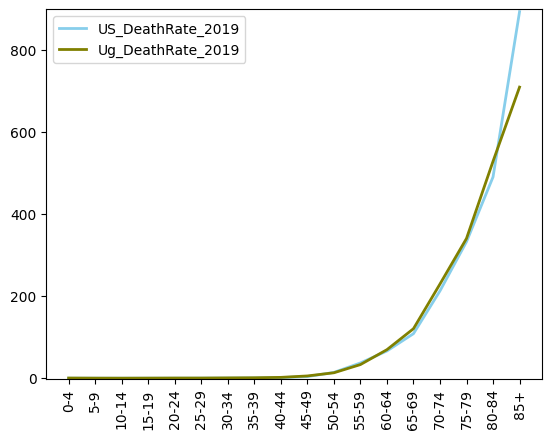

In [36]:
plt.plot('AgeGrp', 'US_DeathRate_2019',data=death_rate,marker='', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=2)
plt.plot('AgeGrp', 'Ug_DeathRate_2019',data=death_rate,marker='', color='olive', linewidth=2)
plt.xticks(rotation=90)
plt.ylim(-2,900)
plt.legend()
plt.show()

In [37]:
# Merging the US death rate column from the COPD death rate table in to USA dataframe on the column Age Group

mylist=['US_DeathRate_2019', 'AgeGrp']
df_am=df_am.merge(death_rate[mylist], on='AgeGrp')
df_am

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,US_DeathRate_2019
0,Country/Area,United States of America,2019,2019,0-4,0,5,10148221,9700335,19848556,0.04
1,Country/Area,United States of America,2019,2019,5-9,5,5,10595892,10101183,20697075,0.02
2,Country/Area,United States of America,2019,2019,10-14,10,5,11308633,10783534,22092167,0.02
3,Country/Area,United States of America,2019,2019,15-19,15,5,11187440,10707683,21895123,0.02
4,Country/Area,United States of America,2019,2019,20-24,20,5,11150829,10720979,21871808,0.06
5,Country/Area,United States of America,2019,2019,25-29,25,5,11875915,11531013,23406928,0.11
6,Country/Area,United States of America,2019,2019,30-34,30,5,11568362,11273789,22842151,0.29
7,Country/Area,United States of America,2019,2019,35-39,35,5,11252331,11044621,22296952,0.56
8,Country/Area,United States of America,2019,2019,40-44,40,5,10367013,10327542,20694555,1.42
9,Country/Area,United States of America,2019,2019,45-49,45,5,10626499,10617759,21244258,4.00


In [38]:
# Merging the Uganda death rate column from the COPD death rate table in to Uganda dataframe on the column Age Group

mylist2=['Ug_DeathRate_2019', 'AgeGrp']
df_ugh=df_ugh.merge(death_rate[mylist2], on='AgeGrp')
df_ugh

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,Ug_DeathRate_2019
0,Country/Area,Uganda,2019,2019,0-4,0,5,3700316,3628652,7328968,0.40
1,Country/Area,Uganda,2019,2019,5-9,5,5,3324760,3289660,6614421,0.17
2,Country/Area,Uganda,2019,2019,10-14,10,5,2950579,2948821,5899400,0.07
3,Country/Area,Uganda,2019,2019,15-19,15,5,2567074,2584008,5151082,0.23
4,Country/Area,Uganda,2019,2019,20-24,20,5,2161655,2186517,4348173,0.38
5,Country/Area,Uganda,2019,2019,25-29,25,5,1732902,1766602,3499504,0.40
6,Country/Area,Uganda,2019,2019,30-34,30,5,1290940,1327619,2618559,0.75
7,Country/Area,Uganda,2019,2019,35-39,35,5,933050,970125,1903175,1.11
8,Country/Area,Uganda,2019,2019,40-44,40,5,731193,772476,1503669,2.04
9,Country/Area,Uganda,2019,2019,45-49,45,5,592457,642523,1234979,5.51


Now Merging the WHO standard Population Model column( df2-> Standard_Pop ) in both datasets- US and Uganda

In [39]:
# Checking Data types
print(df2.dtypes)

# We can see that Standard_Pop is of 'object' type, it should be 'float'
# Changing dtype
df2['Standard_Pop']=df2['Standard_Pop'].astype(float)

print(df2.dtypes)

AgeGrp          object
Standard_Pop    object
dtype: object
AgeGrp           object
Standard_Pop    float64
dtype: object


In [40]:
# Adding WHO Population column in USA data
df_am=df_am.merge(df2, on='AgeGrp')
df_am

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,US_DeathRate_2019,Standard_Pop
0,Country/Area,United States of America,2019,2019,0-4,0,5,10148221,9700335,19848556,0.04,8.86
1,Country/Area,United States of America,2019,2019,5-9,5,5,10595892,10101183,20697075,0.02,8.69
2,Country/Area,United States of America,2019,2019,10-14,10,5,11308633,10783534,22092167,0.02,8.60
3,Country/Area,United States of America,2019,2019,15-19,15,5,11187440,10707683,21895123,0.02,8.47
4,Country/Area,United States of America,2019,2019,20-24,20,5,11150829,10720979,21871808,0.06,8.22
5,Country/Area,United States of America,2019,2019,25-29,25,5,11875915,11531013,23406928,0.11,7.93
6,Country/Area,United States of America,2019,2019,30-34,30,5,11568362,11273789,22842151,0.29,7.61
7,Country/Area,United States of America,2019,2019,35-39,35,5,11252331,11044621,22296952,0.56,7.15
8,Country/Area,United States of America,2019,2019,40-44,40,5,10367013,10327542,20694555,1.42,6.59
9,Country/Area,United States of America,2019,2019,45-49,45,5,10626499,10617759,21244258,4.00,6.04


In [41]:
# Adding WHO Population column in Uganda data
df_ugh=df_ugh.merge(df2, on='AgeGrp')
df_ugh

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,Ug_DeathRate_2019,Standard_Pop
0,Country/Area,Uganda,2019,2019,0-4,0,5,3700316,3628652,7328968,0.40,8.86
1,Country/Area,Uganda,2019,2019,5-9,5,5,3324760,3289660,6614421,0.17,8.69
2,Country/Area,Uganda,2019,2019,10-14,10,5,2950579,2948821,5899400,0.07,8.60
3,Country/Area,Uganda,2019,2019,15-19,15,5,2567074,2584008,5151082,0.23,8.47
4,Country/Area,Uganda,2019,2019,20-24,20,5,2161655,2186517,4348173,0.38,8.22
5,Country/Area,Uganda,2019,2019,25-29,25,5,1732902,1766602,3499504,0.40,7.93
6,Country/Area,Uganda,2019,2019,30-34,30,5,1290940,1327619,2618559,0.75,7.61
7,Country/Area,Uganda,2019,2019,35-39,35,5,933050,970125,1903175,1.11,7.15
8,Country/Area,Uganda,2019,2019,40-44,40,5,731193,772476,1503669,2.04,6.59
9,Country/Area,Uganda,2019,2019,45-49,45,5,592457,642523,1234979,5.51,6.04



# Calculating Deaths per age group


Creating a new column- Death_AgeGrp.

The Formula used: for Death per 100000 population-

Crude Death Rate(CMR/CDR)= (Total People died/Total Population)*100000

In [42]:
# Calculating death counts for USA; rounding it to 2 decimal place.

for i in range(len(df_am)):
  df_am['Death_AgeGrp']=round((df_am['PopTotal']*df_am['US_DeathRate_2019'])/100000,2)

df_am

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,US_DeathRate_2019,Standard_Pop,Death_AgeGrp
0,Country/Area,United States of America,2019,2019,0-4,0,5,10148221,9700335,19848556,0.04,8.86,7.94
1,Country/Area,United States of America,2019,2019,5-9,5,5,10595892,10101183,20697075,0.02,8.69,4.14
2,Country/Area,United States of America,2019,2019,10-14,10,5,11308633,10783534,22092167,0.02,8.60,4.42
3,Country/Area,United States of America,2019,2019,15-19,15,5,11187440,10707683,21895123,0.02,8.47,4.38
4,Country/Area,United States of America,2019,2019,20-24,20,5,11150829,10720979,21871808,0.06,8.22,13.12
5,Country/Area,United States of America,2019,2019,25-29,25,5,11875915,11531013,23406928,0.11,7.93,25.75
6,Country/Area,United States of America,2019,2019,30-34,30,5,11568362,11273789,22842151,0.29,7.61,66.24
7,Country/Area,United States of America,2019,2019,35-39,35,5,11252331,11044621,22296952,0.56,7.15,124.86
8,Country/Area,United States of America,2019,2019,40-44,40,5,10367013,10327542,20694555,1.42,6.59,293.86
9,Country/Area,United States of America,2019,2019,45-49,45,5,10626499,10617759,21244258,4.00,6.04,849.77


In [43]:
# # Calculating death counts for Uganda; rounding it to 2 decimal place.

for i in range(len(df_ugh)):
  df_ugh['Death_AgeGrp']=round((df_ugh['PopTotal']*df_ugh['Ug_DeathRate_2019'])/100000,1)

df_ugh

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,Ug_DeathRate_2019,Standard_Pop,Death_AgeGrp
0,Country/Area,Uganda,2019,2019,0-4,0,5,3700316,3628652,7328968,0.40,8.86,29.3
1,Country/Area,Uganda,2019,2019,5-9,5,5,3324760,3289660,6614421,0.17,8.69,11.2
2,Country/Area,Uganda,2019,2019,10-14,10,5,2950579,2948821,5899400,0.07,8.60,4.1
3,Country/Area,Uganda,2019,2019,15-19,15,5,2567074,2584008,5151082,0.23,8.47,11.8
4,Country/Area,Uganda,2019,2019,20-24,20,5,2161655,2186517,4348173,0.38,8.22,16.5
5,Country/Area,Uganda,2019,2019,25-29,25,5,1732902,1766602,3499504,0.40,7.93,14.0
6,Country/Area,Uganda,2019,2019,30-34,30,5,1290940,1327619,2618559,0.75,7.61,19.6
7,Country/Area,Uganda,2019,2019,35-39,35,5,933050,970125,1903175,1.11,7.15,21.1
8,Country/Area,Uganda,2019,2019,40-44,40,5,731193,772476,1503669,2.04,6.59,30.7
9,Country/Area,Uganda,2019,2019,45-49,45,5,592457,642523,1234979,5.51,6.04,68.0


Calculating Total Population and Total deaths for both countries.

In [44]:
US_tot_pop=df_am['PopTotal'].sum()
print('Total Population of USA in-', US_tot_pop)

US_tot_death=df_am['Death_AgeGrp'].sum()
print('Total Death in USA due to COPD- ', US_tot_death)


Total Population of USA in- 334319668
Total Death in USA due to COPD-  191351.43


In [45]:
Ug_tot_pop=df_ugh['PopTotal'].sum()
print('Total Population of Uganda in-', Ug_tot_pop)

Ug_tot_death=df_ugh['Death_AgeGrp'].sum()
print('Total Death in Uganda due to COPD- ', Ug_tot_death)

Total Population of Uganda in- 42949079
Total Death in Uganda due to COPD-  2497.8


**Calculating Crude Death Rate**

In [46]:
US_crude_rate=round((US_tot_death/US_tot_pop)*100000,1)
US_crude_rate

57.2

In [47]:
Ug_crude_rate=round((Ug_tot_death/Ug_tot_pop)*100000,1)
Ug_crude_rate

5.8

**Result 1**
Looking at the Crude rate: We can tell that death is USA is almost 10 times more than in Uganda.

1.   In USA 57.2 death per 100000 population
2.   In Uganda 5.8 death per 100000 population

But we cannot make such a statement based on the crude rate, because the difference in the death rates may be due to USA's higher proportion of older people compared to Uganda.

If we want to accurately compare the rates of a health outcome that becomes more frequent with age, we need to apply age standardization by adjusting these rates to a standard population.

But we have seen in the Death rate table that Rate is higher for the Uganda. So how can be the deaths in USA are more than deaths in Uganda.

Lets look at the Poppulation Distribution chart.

In [48]:
# Importing Libraries to build charts

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [49]:
for i in range(len(df_am)):
  df_am['Percent']=round((df_am['PopTotal']/df_am['PopTotal'].sum())*100,2)

df_am

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,US_DeathRate_2019,Standard_Pop,Death_AgeGrp,Percent
0,Country/Area,United States of America,2019,2019,0-4,0,5,10148221,9700335,19848556,0.04,8.86,7.94,5.94
1,Country/Area,United States of America,2019,2019,5-9,5,5,10595892,10101183,20697075,0.02,8.69,4.14,6.19
2,Country/Area,United States of America,2019,2019,10-14,10,5,11308633,10783534,22092167,0.02,8.60,4.42,6.61
3,Country/Area,United States of America,2019,2019,15-19,15,5,11187440,10707683,21895123,0.02,8.47,4.38,6.55
4,Country/Area,United States of America,2019,2019,20-24,20,5,11150829,10720979,21871808,0.06,8.22,13.12,6.54
5,Country/Area,United States of America,2019,2019,25-29,25,5,11875915,11531013,23406928,0.11,7.93,25.75,7.00
6,Country/Area,United States of America,2019,2019,30-34,30,5,11568362,11273789,22842151,0.29,7.61,66.24,6.83
7,Country/Area,United States of America,2019,2019,35-39,35,5,11252331,11044621,22296952,0.56,7.15,124.86,6.67
8,Country/Area,United States of America,2019,2019,40-44,40,5,10367013,10327542,20694555,1.42,6.59,293.86,6.19
9,Country/Area,United States of America,2019,2019,45-49,45,5,10626499,10617759,21244258,4.00,6.04,849.77,6.35


In [50]:
for i in range(len(df_ugh)):
  df_ugh['Percent']=round((df_ugh['PopTotal']/df_ugh['PopTotal'].sum())*100,2)

df_ugh

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,Ug_DeathRate_2019,Standard_Pop,Death_AgeGrp,Percent
0,Country/Area,Uganda,2019,2019,0-4,0,5,3700316,3628652,7328968,0.40,8.86,29.3,17.06
1,Country/Area,Uganda,2019,2019,5-9,5,5,3324760,3289660,6614421,0.17,8.69,11.2,15.40
2,Country/Area,Uganda,2019,2019,10-14,10,5,2950579,2948821,5899400,0.07,8.60,4.1,13.74
3,Country/Area,Uganda,2019,2019,15-19,15,5,2567074,2584008,5151082,0.23,8.47,11.8,11.99
4,Country/Area,Uganda,2019,2019,20-24,20,5,2161655,2186517,4348173,0.38,8.22,16.5,10.12
5,Country/Area,Uganda,2019,2019,25-29,25,5,1732902,1766602,3499504,0.40,7.93,14.0,8.15
6,Country/Area,Uganda,2019,2019,30-34,30,5,1290940,1327619,2618559,0.75,7.61,19.6,6.10
7,Country/Area,Uganda,2019,2019,35-39,35,5,933050,970125,1903175,1.11,7.15,21.1,4.43
8,Country/Area,Uganda,2019,2019,40-44,40,5,731193,772476,1503669,2.04,6.59,30.7,3.50
9,Country/Area,Uganda,2019,2019,45-49,45,5,592457,642523,1234979,5.51,6.04,68.0,2.88


In [51]:
for i in range(len(df_am)):
  df_am['pop_prcnt']=round(((df_am['PopTotal']/US_tot_pop)*100),2)

df_am

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,US_DeathRate_2019,Standard_Pop,Death_AgeGrp,Percent,pop_prcnt
0,Country/Area,United States of America,2019,2019,0-4,0,5,10148221,9700335,19848556,0.04,8.86,7.94,5.94,5.94
1,Country/Area,United States of America,2019,2019,5-9,5,5,10595892,10101183,20697075,0.02,8.69,4.14,6.19,6.19
2,Country/Area,United States of America,2019,2019,10-14,10,5,11308633,10783534,22092167,0.02,8.60,4.42,6.61,6.61
3,Country/Area,United States of America,2019,2019,15-19,15,5,11187440,10707683,21895123,0.02,8.47,4.38,6.55,6.55
4,Country/Area,United States of America,2019,2019,20-24,20,5,11150829,10720979,21871808,0.06,8.22,13.12,6.54,6.54
5,Country/Area,United States of America,2019,2019,25-29,25,5,11875915,11531013,23406928,0.11,7.93,25.75,7.00,7.00
6,Country/Area,United States of America,2019,2019,30-34,30,5,11568362,11273789,22842151,0.29,7.61,66.24,6.83,6.83
7,Country/Area,United States of America,2019,2019,35-39,35,5,11252331,11044621,22296952,0.56,7.15,124.86,6.67,6.67
8,Country/Area,United States of America,2019,2019,40-44,40,5,10367013,10327542,20694555,1.42,6.59,293.86,6.19,6.19
9,Country/Area,United States of America,2019,2019,45-49,45,5,10626499,10617759,21244258,4.00,6.04,849.77,6.35,6.35


In [52]:
for i in range(len(df_ugh)):
  df_ugh['pop_prcnt']=round(((df_ugh['PopTotal']/Ug_tot_pop)*100),2)

df_ugh

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,Ug_DeathRate_2019,Standard_Pop,Death_AgeGrp,Percent,pop_prcnt
0,Country/Area,Uganda,2019,2019,0-4,0,5,3700316,3628652,7328968,0.40,8.86,29.3,17.06,17.06
1,Country/Area,Uganda,2019,2019,5-9,5,5,3324760,3289660,6614421,0.17,8.69,11.2,15.40,15.40
2,Country/Area,Uganda,2019,2019,10-14,10,5,2950579,2948821,5899400,0.07,8.60,4.1,13.74,13.74
3,Country/Area,Uganda,2019,2019,15-19,15,5,2567074,2584008,5151082,0.23,8.47,11.8,11.99,11.99
4,Country/Area,Uganda,2019,2019,20-24,20,5,2161655,2186517,4348173,0.38,8.22,16.5,10.12,10.12
5,Country/Area,Uganda,2019,2019,25-29,25,5,1732902,1766602,3499504,0.40,7.93,14.0,8.15,8.15
6,Country/Area,Uganda,2019,2019,30-34,30,5,1290940,1327619,2618559,0.75,7.61,19.6,6.10,6.10
7,Country/Area,Uganda,2019,2019,35-39,35,5,933050,970125,1903175,1.11,7.15,21.1,4.43,4.43
8,Country/Area,Uganda,2019,2019,40-44,40,5,731193,772476,1503669,2.04,6.59,30.7,3.50,3.50
9,Country/Area,Uganda,2019,2019,45-49,45,5,592457,642523,1234979,5.51,6.04,68.0,2.88,2.88


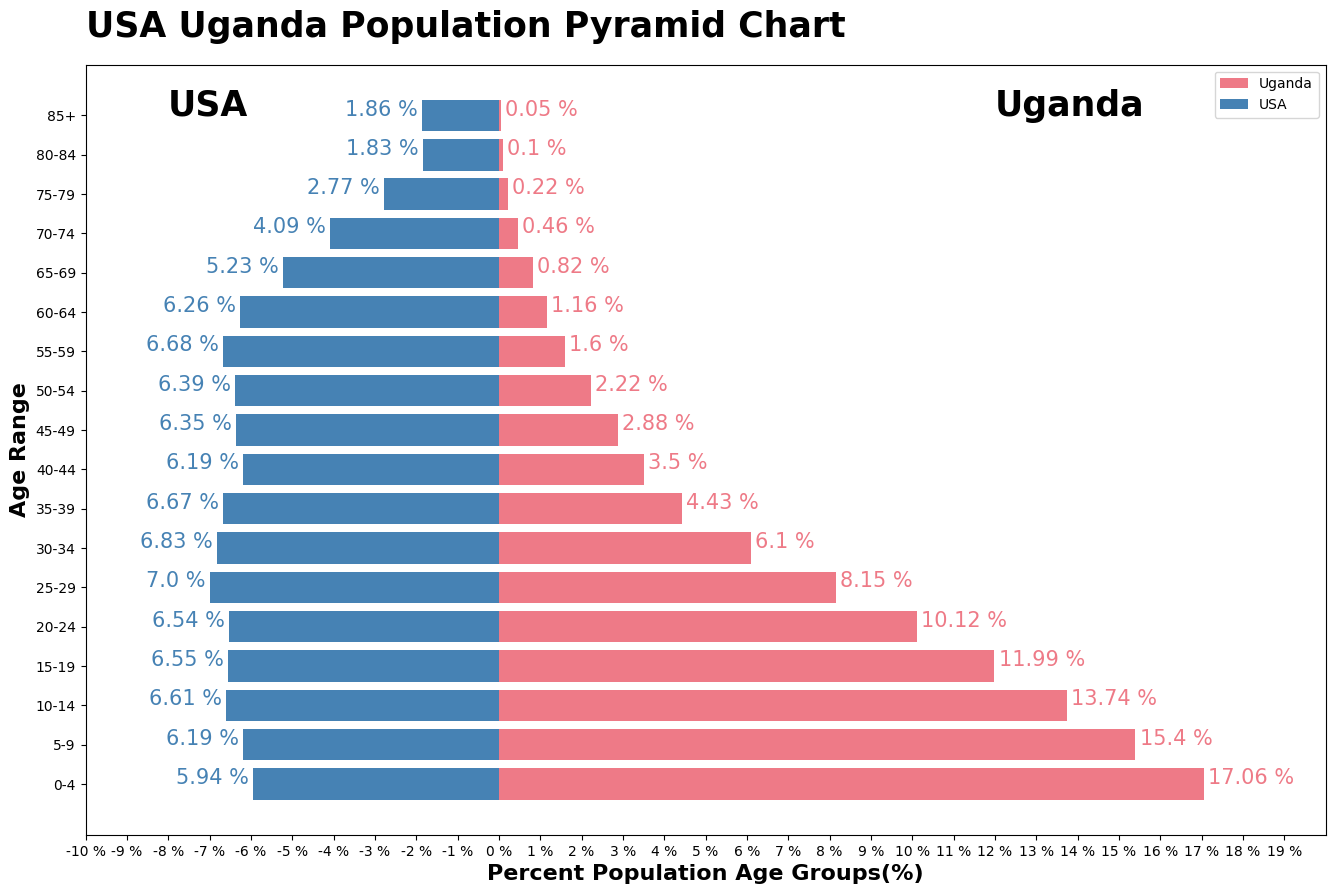

In [53]:
fig = plt.figure(figsize=(16,10))
plt.barh(y=df_ugh["AgeGrp"], width=df_ugh['pop_prcnt'], color="#ee7a87", label="Uganda");
plt.barh(y=df_am["AgeGrp"], width=df_am['pop_prcnt'], left= -df_am['pop_prcnt'],
         color="#4682b4", label="USA");

plt.text(-8, 17, "USA", fontsize=25, fontweight="bold");
plt.text(12, 17, "Uganda", fontsize=25, fontweight="bold");

for idx in range(len(df_am)):
    plt.text(x= -df_am['pop_prcnt'][idx]-0.1, y=idx, s="{} %".format(df_am['pop_prcnt'][idx]),
             ha="right",
             fontsize=15, color="#4682b4");
    plt.text(x=df_ugh['pop_prcnt'][idx]+0.1, y=idx, s="{} %".format(df_ugh['pop_prcnt'][idx]),
             ha="left",
             fontsize=15, color="#ee7a87");

plt.xlim(-10,20);
plt.xticks(range(-10,20), ["{} %".format(i) for i in range(-10,20)]);

plt.legend(loc="best");

plt.xlabel("Percent Population Age Groups(%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Range", fontsize=16, fontweight="bold")
plt.title("USA Uganda Population Pyramid Chart", loc="left", pad=20, fontsize=25, fontweight="bold");

We can see from the above population density pyramid graph that Uganda have more population percentage under 20 than USA. America shares more of its population percentage above 20 years.

# Standarzing the population by age groups using WHO standard table

Creating new column- Std_pop. Multiplying Death_rate column to Standard_pop columns. This will give the standard adjusted population ratio.

These age-standardized rates allow us to compare COPD death rates in Uganda and USa as if they applied to two countries with identical age structures.

In [54]:
# Age adjustment for USA

df_am['Standard_Pop']=df_am['Standard_Pop']/100
for i in range(len(df_am)):
  df_am['Std_Pop_Death']=round(df_am['US_DeathRate_2019']*df_am['Standard_Pop'],3)

df_am

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,US_DeathRate_2019,Standard_Pop,Death_AgeGrp,Percent,pop_prcnt,Std_Pop_Death
0,Country/Area,United States of America,2019,2019,0-4,0,5,10148221,9700335,19848556,0.04,0.0886,7.94,5.94,5.94,0.004
1,Country/Area,United States of America,2019,2019,5-9,5,5,10595892,10101183,20697075,0.02,0.0869,4.14,6.19,6.19,0.002
2,Country/Area,United States of America,2019,2019,10-14,10,5,11308633,10783534,22092167,0.02,0.0860,4.42,6.61,6.61,0.002
3,Country/Area,United States of America,2019,2019,15-19,15,5,11187440,10707683,21895123,0.02,0.0847,4.38,6.55,6.55,0.002
4,Country/Area,United States of America,2019,2019,20-24,20,5,11150829,10720979,21871808,0.06,0.0822,13.12,6.54,6.54,0.005
5,Country/Area,United States of America,2019,2019,25-29,25,5,11875915,11531013,23406928,0.11,0.0793,25.75,7.00,7.00,0.009
6,Country/Area,United States of America,2019,2019,30-34,30,5,11568362,11273789,22842151,0.29,0.0761,66.24,6.83,6.83,0.022
7,Country/Area,United States of America,2019,2019,35-39,35,5,11252331,11044621,22296952,0.56,0.0715,124.86,6.67,6.67,0.040
8,Country/Area,United States of America,2019,2019,40-44,40,5,10367013,10327542,20694555,1.42,0.0659,293.86,6.19,6.19,0.094
9,Country/Area,United States of America,2019,2019,45-49,45,5,10626499,10617759,21244258,4.00,0.0604,849.77,6.35,6.35,0.242


In [55]:
# Adding the values which will give age adjusted Death rate.

usa_age_std_death=round(df_am['Std_Pop_Death'].sum(),1)
usa_age_std_death

28.4

In [56]:
# Age adjustment for USA

df_ugh['Standard_Pop']=df_ugh['Standard_Pop']/100
for i in range(len(df_ugh)):
  df_ugh['Std_Pop_Death']=round(df_ugh['Ug_DeathRate_2019']*df_ugh['Standard_Pop'],3)

df_ugh

,LocTypeName,Location,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,Ug_DeathRate_2019,Standard_Pop,Death_AgeGrp,Percent,pop_prcnt,Std_Pop_Death
0,Country/Area,Uganda,2019,2019,0-4,0,5,3700316,3628652,7328968,0.40,0.0886,29.3,17.06,17.06,0.035
1,Country/Area,Uganda,2019,2019,5-9,5,5,3324760,3289660,6614421,0.17,0.0869,11.2,15.40,15.40,0.015
2,Country/Area,Uganda,2019,2019,10-14,10,5,2950579,2948821,5899400,0.07,0.0860,4.1,13.74,13.74,0.006
3,Country/Area,Uganda,2019,2019,15-19,15,5,2567074,2584008,5151082,0.23,0.0847,11.8,11.99,11.99,0.019
4,Country/Area,Uganda,2019,2019,20-24,20,5,2161655,2186517,4348173,0.38,0.0822,16.5,10.12,10.12,0.031
5,Country/Area,Uganda,2019,2019,25-29,25,5,1732902,1766602,3499504,0.40,0.0793,14.0,8.15,8.15,0.032
6,Country/Area,Uganda,2019,2019,30-34,30,5,1290940,1327619,2618559,0.75,0.0761,19.6,6.10,6.10,0.057
7,Country/Area,Uganda,2019,2019,35-39,35,5,933050,970125,1903175,1.11,0.0715,21.1,4.43,4.43,0.079
8,Country/Area,Uganda,2019,2019,40-44,40,5,731193,772476,1503669,2.04,0.0659,30.7,3.50,3.50,0.134
9,Country/Area,Uganda,2019,2019,45-49,45,5,592457,642523,1234979,5.51,0.0604,68.0,2.88,2.88,0.333


In [57]:
# Adding the values which will give age adjusted Death rate for Uganda

uganda_age_std_death=round(df_ugh['Std_Pop_Death'].sum(),1)
uganda_age_std_death

28.7

# Creating a Comparison chart to visualize Death Rates

In [58]:
# Creating a new dataframe
temp={'Country':['United States of America', 'Uganda'],
      'Crude_rate/100k':[US_crude_rate, Ug_crude_rate],
      'Age-Standardized Death Rate/100k':[usa_age_std_death, uganda_age_std_death]}
result= pd.DataFrame(temp)
result

,Country,Crude_rate/100k,Age-Standardized Death Rate/100k
0,United States of America,57.2,28.4
1,Uganda,5.8,28.7


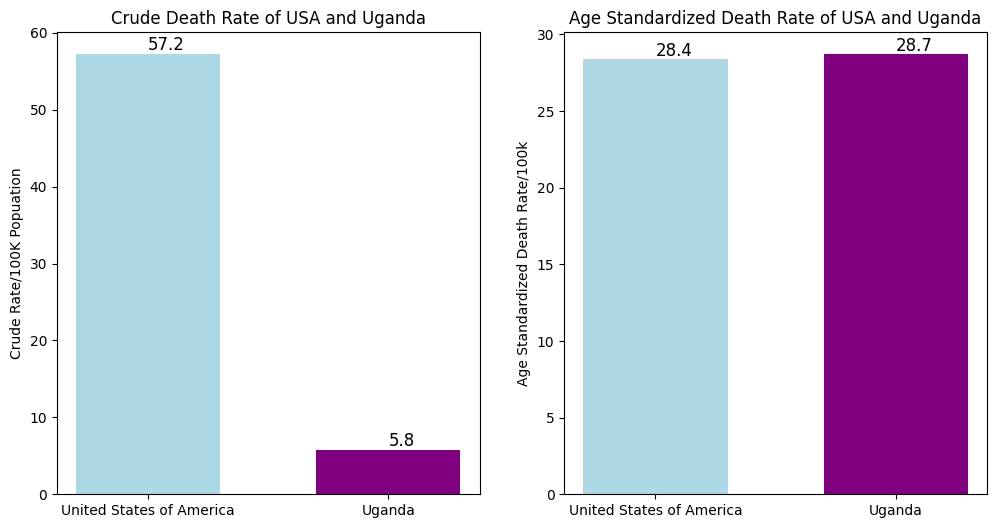

In [59]:
# Creating Subplots

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
color=['Lightblue','Purple']
label1=[57.2,5.8]
x1 = [0, 1]
y1 = [57.2, 5.8]

label2=[28.4,28.7]
x2 = [0, 1]
y2 = [28.4,28.7]

ax1.bar(x='Country',height='Crude_rate/100k',width=.6,color=color,data=result)
ax2.bar(x='Country',height='Age-Standardized Death Rate/100k',width=.6,color=color,data=result)

ax1.set_ylabel('Crude Rate/100K Popuation')
ax1.set_title('Crude Death Rate of USA and Uganda')

for i in range(len(result)):
  ax1.text(x1[i],y1[i]+.5,s=label1[i],fontsize=12)

for i in range(len(result)):
  ax2.text(x2[i],y2[i]+.2,s=label2[i],fontsize=12)

ax2.set_ylabel('Age Standardized Death Rate/100k')
ax2.set_title('Age Standardized Death Rate of USA and Uganda')

plt.show()

# Conclusion

In the end we can deduce from the above Exploratory data analysis that-

On the high level Crude rate of USA was 57.2 and Uganda was 5.8. But that result was not fully correct as population density is not the same for both the countries. USA share more of its population with above 20 years. and Uganda shares more of its population under 20 comparative to USA.

Formula:
Crude Rate=(Total Death/Total Population)*100000

After calculating Crude Death rate for each country we applied the Direct Age Standardization method and calculated the Age standardized death rate.
Formula:

Age Std Rate= Summation of(Death_rate*Std_pop)

In the end we can no tell though by looking at the crude rate only we saw that USA has higher death rate than Uganda. But after applying Age adjustemnet we now see that Uganda has little more Death rate than USA.

